## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [9]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


W1205 20:51:59.728319 17612 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1205 20:51:59.731311 17612 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1205 20:51:59.784169 17612 deprecation_wrapper.py:119] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W1205 20:51:59.878487 17612 deprecation.py:323] From C:\Users\jcodeboy\Anaconda3\envs\tensorflow-GPU\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated a

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 1/50
50000/50000 [==============================] - 2s 41us/step - loss: 1.8236 - acc: 0.3467 - val_loss: 1.6662 - val_acc: 0.4129
Epoch 2/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5969 - acc: 0.4318 - val_loss: 1.6334 - val_acc: 0.4199
Epoch 3/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5078 - acc: 0.4638 - val_loss: 1.5739 - val_acc: 0.4358
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.4500 - acc: 0.4854 - val_loss: 1.6150 - val_acc: 0.4403
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.3994 - acc: 0.5027 - val_loss: 1.4629 - val_acc: 0.4765
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.3595 - acc: 0.5159 - val_loss: 1.4853 - val_acc: 0.4628
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.3284 - acc: 0.5266 - val_loss: 1.4645 - val_acc: 0.4746
Epoch 8/50
50000/50000 [=================

50000/50000 [==============================] - 2s 38us/step - loss: 1.8106 - acc: 0.3662 - val_loss: 1.7526 - val_acc: 0.3848
Epoch 3/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.7250 - acc: 0.3962 - val_loss: 1.6918 - val_acc: 0.4107
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6637 - acc: 0.4174 - val_loss: 1.6556 - val_acc: 0.4202
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.6177 - acc: 0.4334 - val_loss: 1.6220 - val_acc: 0.4293
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5784 - acc: 0.4474 - val_loss: 1.5835 - val_acc: 0.4380
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 1.5455 - acc: 0.4598 - val_loss: 1.5442 - val_acc: 0.4534
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.5157 - acc: 0.4700 - val_loss: 1.5320 - val_acc: 0.4574
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 38us/step - loss: 2.0243 - acc: 0.2926 - val_loss: 1.9941 - val_acc: 0.2963
Epoch 4/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9704 - acc: 0.3083 - val_loss: 1.9492 - val_acc: 0.3158
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9315 - acc: 0.3197 - val_loss: 1.9171 - val_acc: 0.3210
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.9021 - acc: 0.3317 - val_loss: 1.8910 - val_acc: 0.3342
Epoch 7/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8784 - acc: 0.3403 - val_loss: 1.8699 - val_acc: 0.3393
Epoch 8/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8588 - acc: 0.3485 - val_loss: 1.8520 - val_acc: 0.3500
Epoch 9/50
50000/50000 [==============================] - 2s 37us/step - loss: 1.8417 - acc: 0.3555 - val_loss: 1.8368 - val_acc: 0.3520
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 38us/step - loss: 2.2425 - acc: 0.1912 - val_loss: 2.2333 - val_acc: 0.2053
Epoch 5/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2253 - acc: 0.2089 - val_loss: 2.2160 - val_acc: 0.2231
Epoch 6/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.2088 - acc: 0.2214 - val_loss: 2.2002 - val_acc: 0.2303
Epoch 7/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1941 - acc: 0.2300 - val_loss: 2.1861 - val_acc: 0.2396
Epoch 8/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1805 - acc: 0.2390 - val_loss: 2.1728 - val_acc: 0.2457
Epoch 9/50
50000/50000 [==============================] - 2s 37us/step - loss: 2.1676 - acc: 0.2415 - val_loss: 2.1599 - val_acc: 0.2512
Epoch 10/50
50000/50000 [==============================] - 2s 38us/step - loss: 2.1547 - acc: 0.2473 - val_loss: 2.1464 - val_acc: 0.2604
Epoch 11/50
50000/50000 [==========================

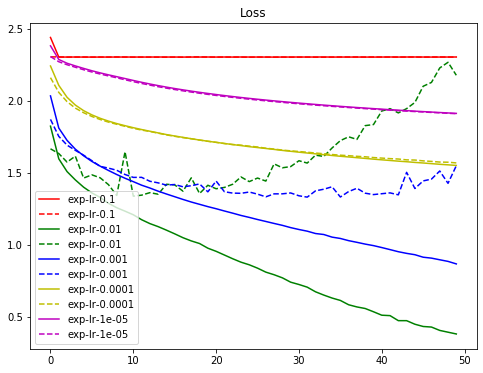

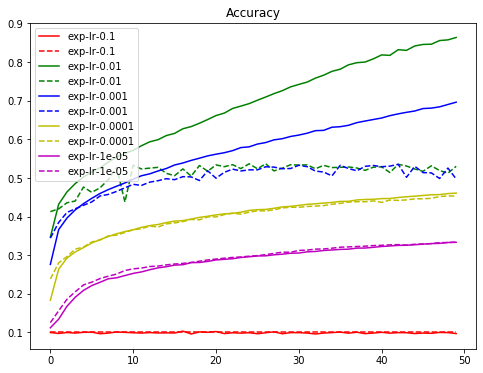

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()